# <font color = "Green"> This notebook is a comprehensive program used for data preprocesssing and build models for Heart Disease Prediction

# <font color= "Indigo">Project Team:
<ol>
  <font color= "Indigo"><li>Abhinay Parasa</li>
  <li>Dileep Lingamallu</li>
  <li>Kayalvizhi Vellaichamy</li>
    <li>Saranya Anandan</li>
    <li>Sphurti Rajesh Pendke</li>
</ol>

### Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 13 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### Data attribute information

- age

- sex

- cp: chest pain type (4 values)

- trestbps: resting blood pressure

- chol: serum cholestoral in mg/dl

- fbs: fasting blood sugar > 120 mg/dl

- restecg: resting electrocardiographic results (values 0,1,2)

- thalach: maximum heart rate achieved

- exang: exercise induced angina

- oldpeak: ST depression induced by exercise relative to rest

- slope: the slope of the peak exercise ST segment

- ca: number of major vessels (0-3) colored by flourosopy

- thal: 0 = normal; 1 = fixed defect; 2 = reversible defect

### Import required packages.

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from mord import LogisticIT

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


import statsmodels.api as sm

from dmba import classificationSummary, gainsChart, liftChart
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import regressionSummary, exhaustive_search 
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import plotDecisionTree, classificationSummary, regressionSummary

from sklearn.neural_network import MLPClassifier, MLPRegressor 
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

no display found. Using non-interactive Agg backend


## Viewing the first few rows of the dataset

In [2]:
# Create data frame for heart data set.
heart_disease_df = pd.read_csv('heart.csv')

# Display the first 10 records of heart_disease_df data frame.
print(heart_disease_df.head(10))


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0 

### Understanding the shape of the dataset

In [3]:
# Determine dimensions of dataframe. 
print('Dimensions of dataframe:',heart_disease_df.shape )
# It has 1025 rows and 14 columns.

Dimensions of dataframe: (1025, 14)


### Check the data types of the columns for the dataset.

In [4]:
# Display column data types in the dataframe
print('Datatypes of all the columns in the dataset')
print(heart_disease_df.info())
heart_disease_df.describe().T

Datatypes of all the columns in the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


- There are no null values
- All columns are integer type except oldpeak which is of float datatype
- Some of the attributes need the conversion into their equivalent dummy values

## EDA

### Univariate analysis

In [5]:
# To understand the central tendency and dispersion of numeric varibales we are using boxplots
# Below function is to create a boxplot and histograms for numeric variables
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observation on age

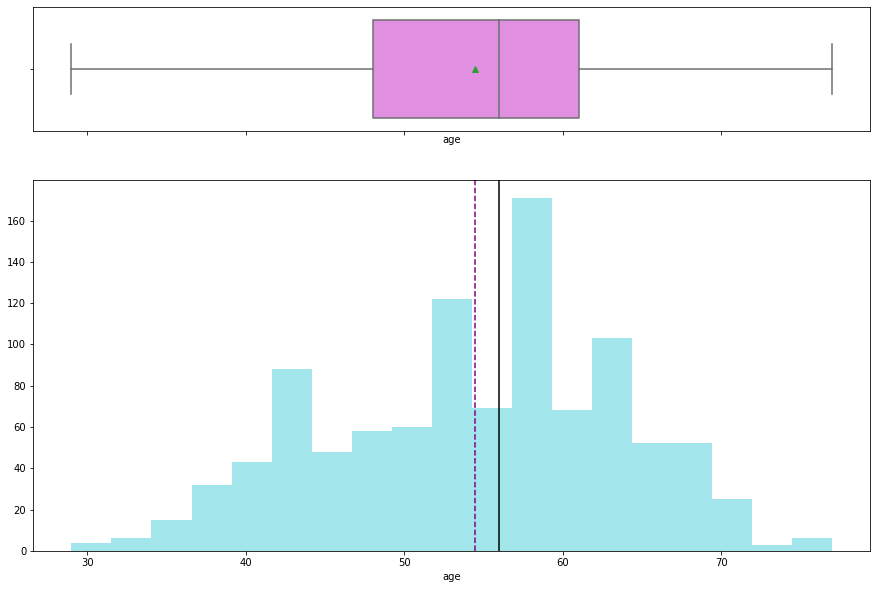

In [6]:
histogram_boxplot(heart_disease_df["age"])

- The distribution of the age is slightly skewed from the mean
- There are many people with the age in range between 40 to 70 and comparatively less number of people below 40 and above 70 years

### Observation on resting BP

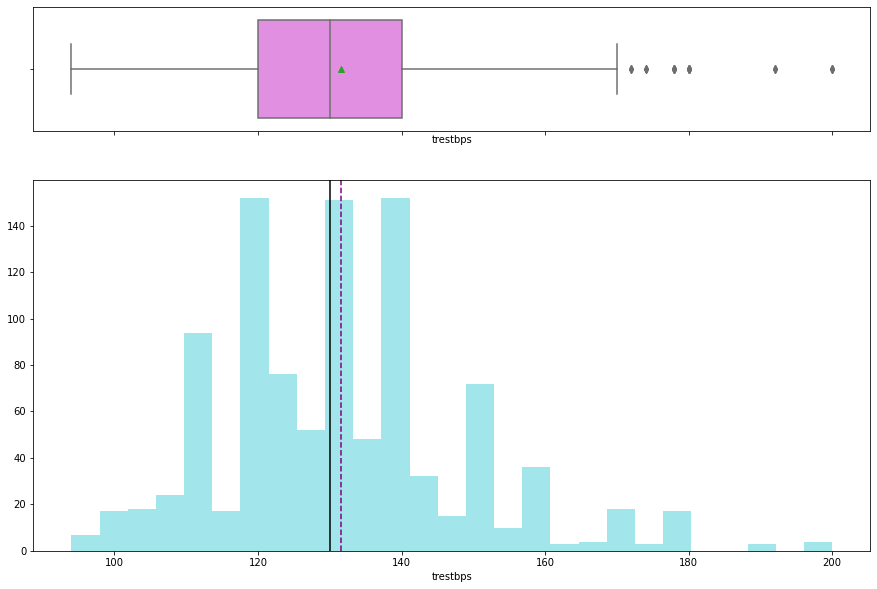

In [7]:
histogram_boxplot(heart_disease_df["trestbps"])

- Resting BP is slightly right skewed 
- From the boxplot we can see that there are very few outliers in the data but as it is blood pressure values we will not perform any outlier treatment on it.

### Observation on Cholesterol

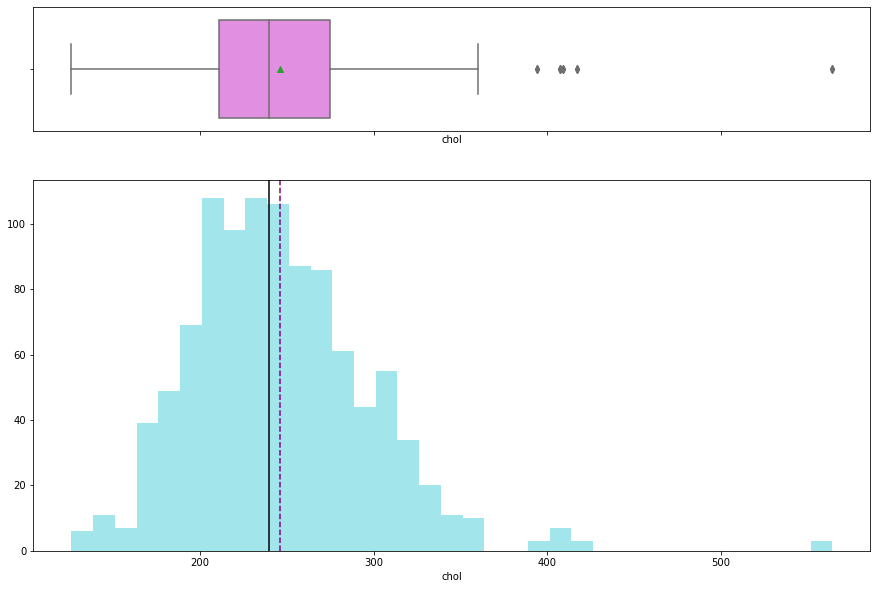

In [8]:
histogram_boxplot(heart_disease_df["chol"])

- The distribution of the cholesterol shows that, for most of the people cholesterol is between the range of 150 to 350

### Observation on thalach

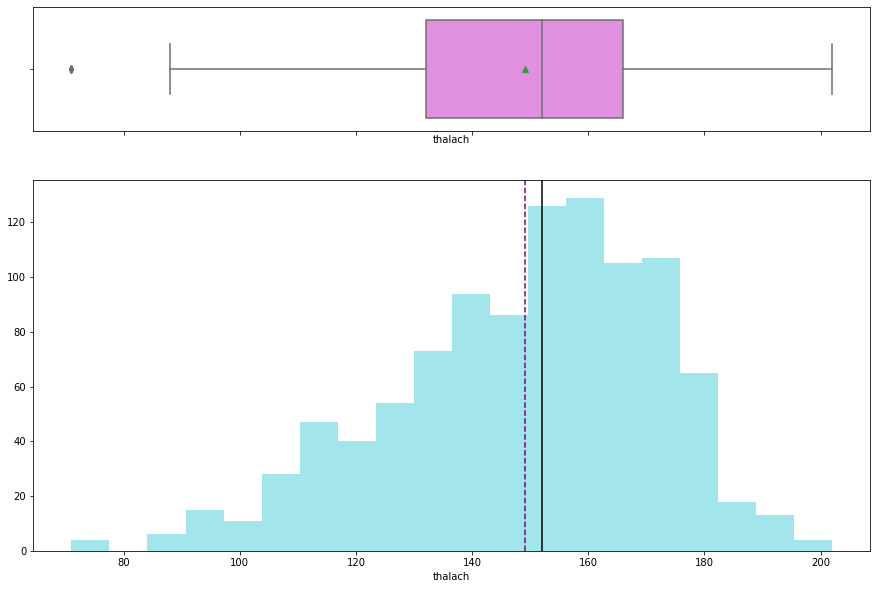

In [9]:
histogram_boxplot(heart_disease_df["thalach"])

- This attribute is skewed to the left

### Observation on oldpeak

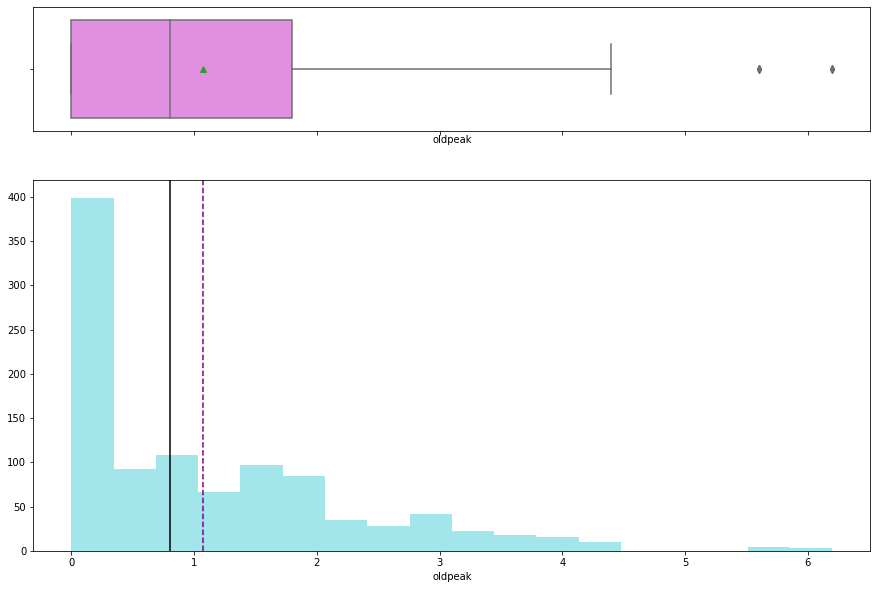

In [10]:
histogram_boxplot(heart_disease_df["oldpeak"])

- The distribution of the oldpeak is skewed to the right

### Analyzing categorical variables

In [11]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(z) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(z,palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Observation on gender

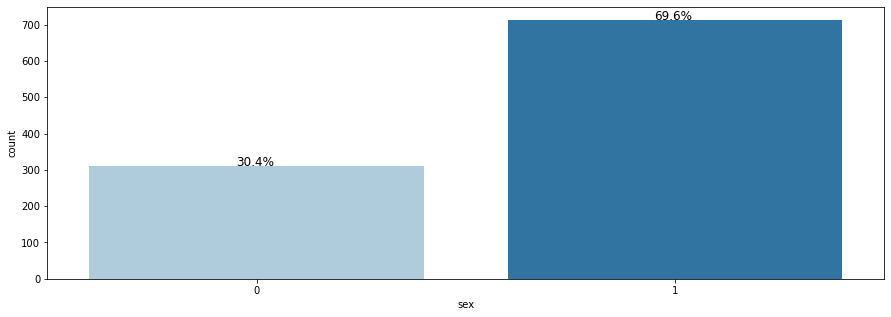

In [12]:
perc_on_bar(heart_disease_df['sex'])

- We have 30.4% female and 69.6% male patients in the dataset


### Observation on fasting blood sugar

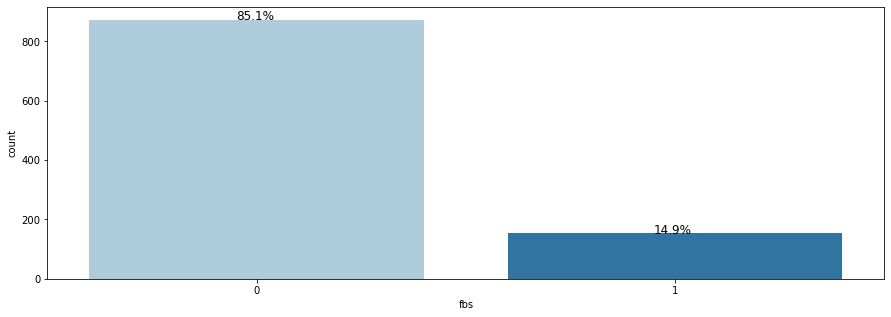

In [13]:
perc_on_bar(heart_disease_df['fbs'])

- Around 85% has less than 120 mg/dl fasting blood sugar level

### Observation on resting ECG

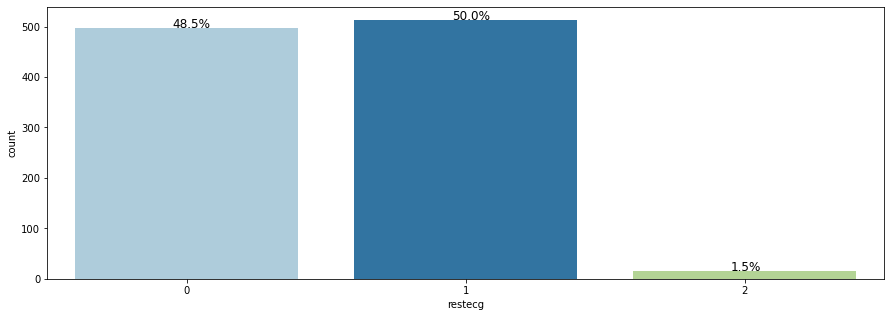

In [14]:
perc_on_bar(heart_disease_df['restecg'])

- There is an equal percentage of type 0  and type 1 categories of resting ecg patients.

### Observation on ExerciseAngina

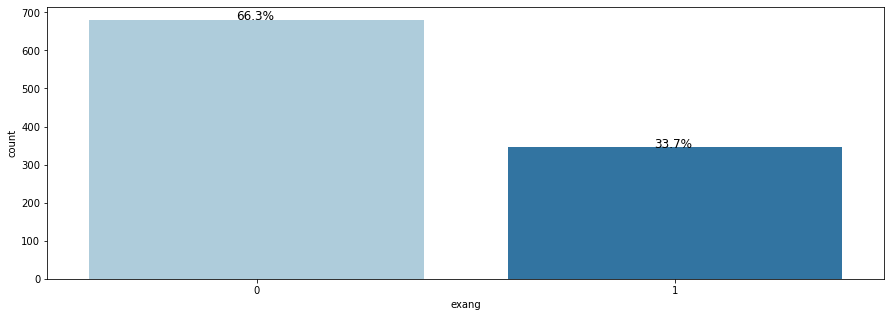

In [15]:
perc_on_bar(heart_disease_df['exang'])

- Around 33% patients seems to have exercise agnia

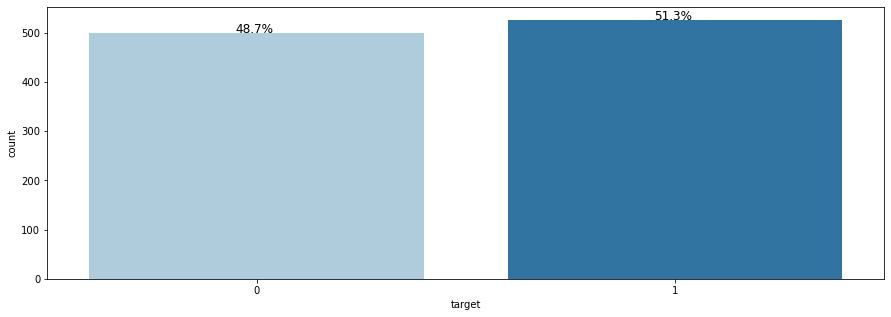

In [16]:
perc_on_bar(heart_disease_df['target'])

- The output variable seems to have equal distribution for the both the classes

### Bivariate analysis

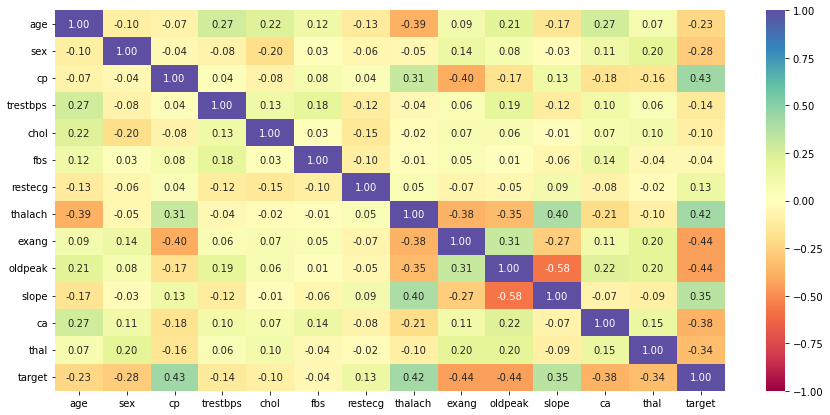

In [17]:
plt.figure(figsize=(15,7))
sns.heatmap(heart_disease_df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

- Oldpeak has a negative correlation with slope variable and the target variable
- The target variable is positively related with cp, thalach, and slope variable
- The target variable is negatively correlated with exang. oldpeak, ca, thal variable.

In [18]:
# Display column data types in the dataframe before modification
print('Original Column data types')
print(heart_disease_df.dtypes)

Original Column data types
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [19]:
# Need to change all the variables with multiple classes to 'category'datatype 
heart_disease_df.cp = heart_disease_df.cp.astype('category')
heart_disease_df.restecg = heart_disease_df.restecg.astype('category')
heart_disease_df.slope = heart_disease_df.slope.astype('category')
heart_disease_df.thal = heart_disease_df.thal.astype('category')

# Display category levels (attributes) and category type.
print(' ')
print('Category levels and changed variable type:')
print(heart_disease_df.cp.cat.categories)
print(heart_disease_df.cp.dtype)
print(heart_disease_df.restecg.cat.categories)
print(heart_disease_df.restecg.dtype)
print(heart_disease_df.slope.cat.categories)
print(heart_disease_df.slope.dtype)
print(heart_disease_df.thal.cat.categories)
print(heart_disease_df.thal.dtype)

 
Category levels and changed variable type:
Int64Index([0, 1, 2, 3], dtype='int64')
category
Int64Index([0, 1, 2], dtype='int64')
category
Int64Index([0, 1, 2], dtype='int64')
category
Int64Index([0, 1, 2, 3], dtype='int64')
category


In [20]:
# Convert category variables into dummy variables, 
# Use drop_first=True to drop the first dummy variable.
heart_disease_df = pd.get_dummies(heart_disease_df, prefix_sep='_',columns=['cp','restecg','slope','thal'],drop_first=True)

#Display modified columns
print(heart_disease_df.columns)

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'target', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2',
       'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')


In [21]:
# Display column data types in the dataframe after modification
print('Modified Column data types')
print(heart_disease_df.dtypes)

Modified Column data types
age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
ca             int64
target         int64
cp_1           uint8
cp_2           uint8
cp_3           uint8
restecg_1      uint8
restecg_2      uint8
slope_1        uint8
slope_2        uint8
thal_1         uint8
thal_2         uint8
thal_3         uint8
dtype: object


### Data summary

In [22]:
# Use describe() function to display column statistics for the entire data set. 
np.round(heart_disease_df.describe(), decimals=2).T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.43,9.07,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.70,0.46,0.0,0.0,1.0,1.0,1.0
trestbps,1025.0,131.61,17.52,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.00,51.59,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.15,0.36,0.0,0.0,0.0,0.0,1.0
thalach,1025.0,149.11,23.01,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.34,0.47,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.07,1.18,0.0,0.0,0.8,1.8,6.2
ca,1025.0,0.75,1.03,0.0,0.0,0.0,1.0,4.0
target,1025.0,0.51,0.50,0.0,0.0,1.0,1.0,1.0


### Observation
- Average age of people is 54.43 and has a wide range from 29years to 77 years
- There are no missing values present in the dataset
- Resting bp ranges from 94 to 200 with the standard deviation of 17.52
- Attributes like sex, fbs, restecg, exang, ca, thal and target are not continuous variables

In [23]:
# Develop predictors X and output variable Y for the data set.
X = heart_disease_df.drop(columns=['target'])
y = heart_disease_df['target']

# Develop training (60%) and validation(40% or 0.4) partitions for
# heart_disease_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [24]:
print('Predictors list')
print(X.columns)

Predictors list
Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1',
       'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')


# <font color= "Green">BUILDING THE DATA MINING METHODS:
<ol>
  <font color= "Indigo"><li>Classification Tree</li>
      <li>Random forest trees</li>
  <li>Boosted trees</li>
    <li>Neural Networks</li>
</ol>

## <font color= "Orange">Different Classification Tree Models:
<ol>
  <font color= "Blue"><li>Smaller Classification tree using random controlled parameters</li>
      <li>Smaller Classification tree using Grid Search results</li>
</ol>

## Smaller classification tree using DecisionTreeClassifier() control parameters

Small Classification Tree with Control Parameters


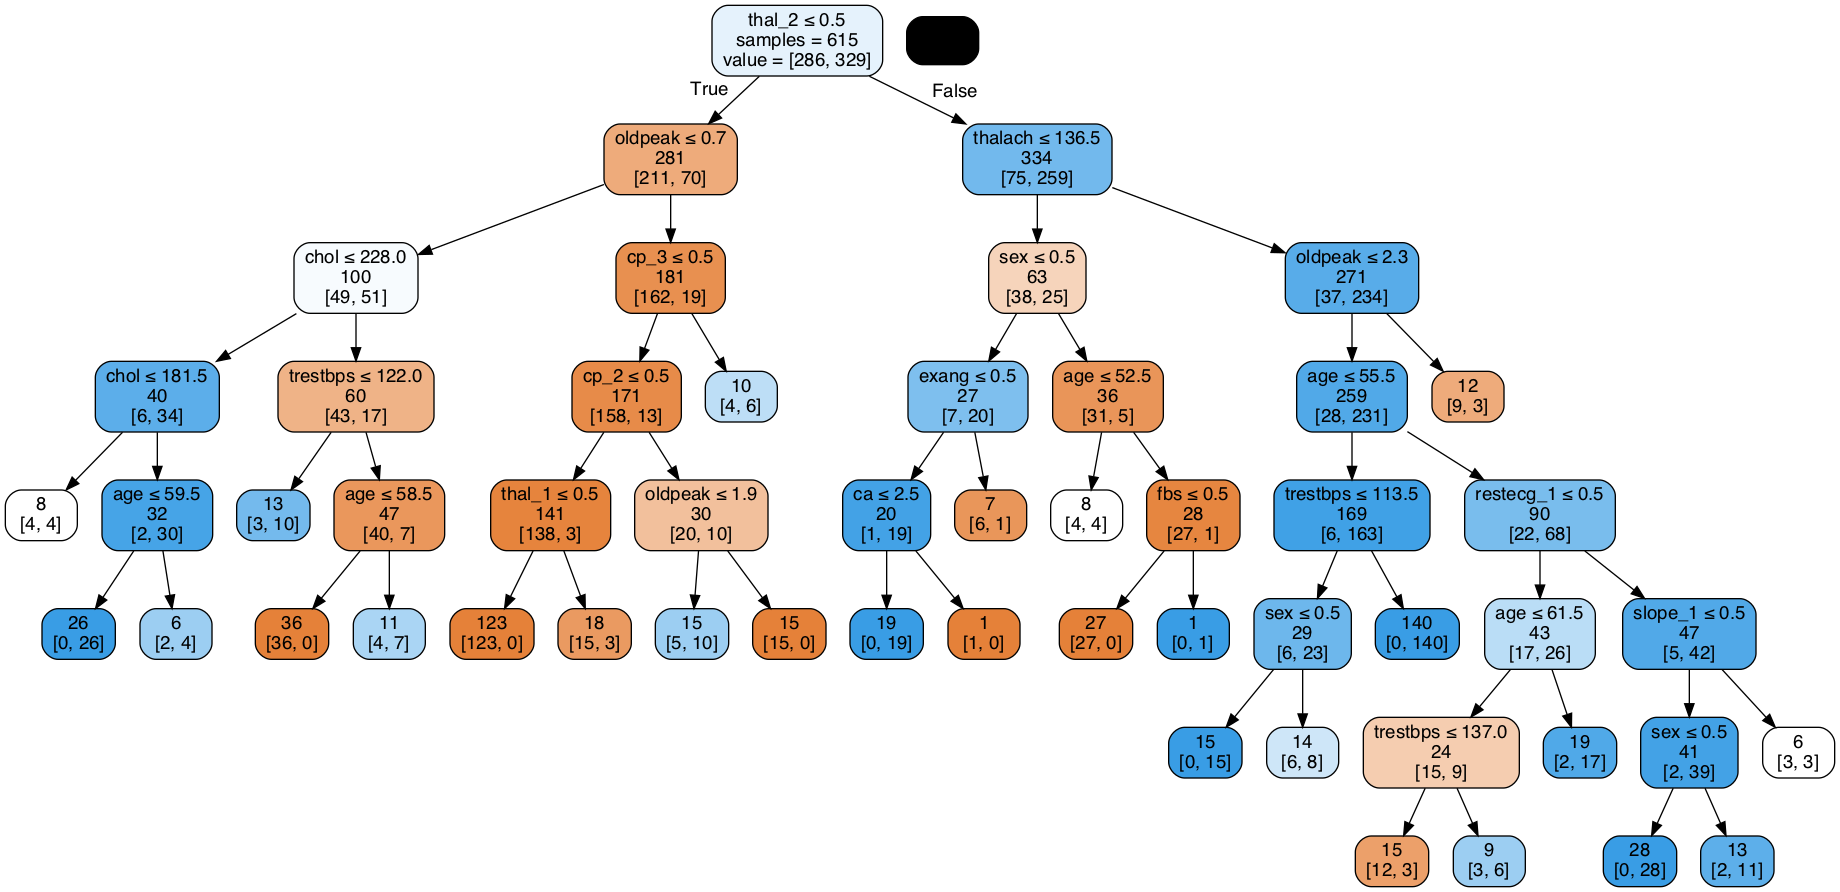

In [25]:
# Create a smaller classification tree for training partition
# using DecisionTreeClassifier() function control parameters:
#  - Maximum Tree depth (number of splits) = 20;
#  - Minimum impurity decrease per split = 0 
#  - Minimum number of sample records in a node for splitting = 20.   
smallClassTree = DecisionTreeClassifier(max_depth=20, 
        min_impurity_decrease=0, min_samples_split=20)
smallClassTree.fit(train_X, train_y)

# Display classification tree for training partition.
print('Small Classification Tree with Control Parameters')
plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [26]:
# Confusion matrices for smaller classification tree. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition for Smaller Tree with control parameters')
classificationSummary(train_y, smallClassTree.predict(train_X))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition for Smaller Tree with control parameters')
classificationSummary(valid_y, smallClassTree.predict(valid_X))


Training Partition for Smaller Tree with control parameters
Confusion Matrix (Accuracy 0.9154)

       Prediction
Actual   0   1
     0 255  31
     1  21 308

Validation Partition for Smaller Tree with control parameters
Confusion Matrix (Accuracy 0.8415)

       Prediction
Actual   0   1
     0 164  49
     1  16 181


## Smaller Classification tree using Grid Search results

In [27]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'max_depth': list(range(2, 20)),  
    'min_impurity_decrease': [0, 0.0005, 0.001], 
    'min_samples_split': list(range(10, 30)),
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() improved parameters. 
gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

# Display best improved paramenters of classification tree. 
print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)


Improved score:0.8846
Improved parameters:  {'max_depth': 14, 'min_impurity_decrease': 0.0005, 'min_samples_split': 10}


Best Classification Tree with Grid Search


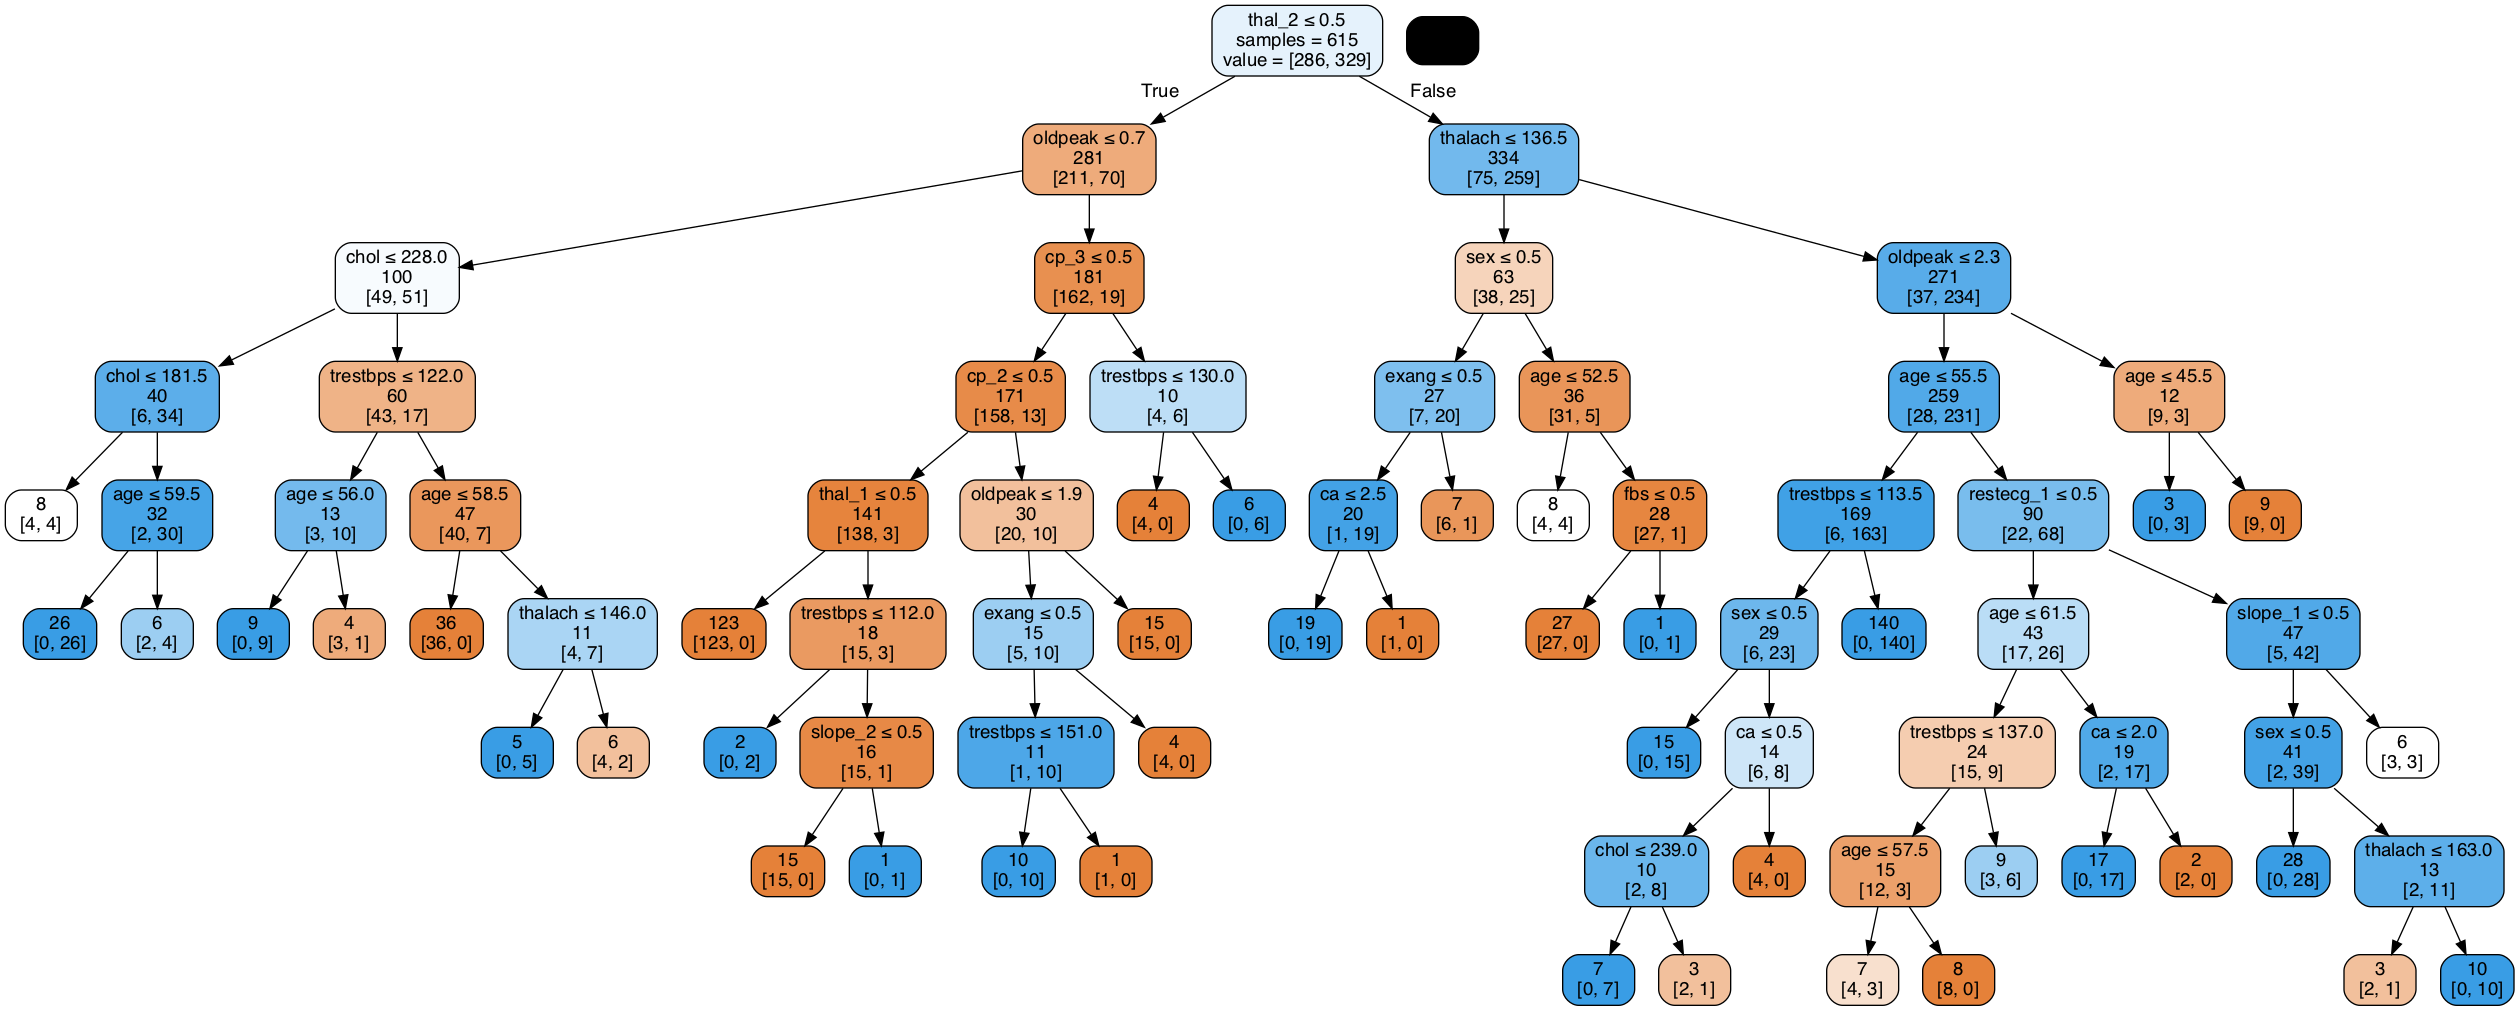

In [28]:
# Create classification tree based on the improved parameters.
bestClassTree = gridSearch.best_estimator_

# Display classification tree based on improved parameters
print('Best Classification Tree with Grid Search')
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [29]:
# Indetify and display number of nodes in the tree
# based on grid search.
tree_nodes_grid = bestClassTree.tree_.node_count
print('Number of nodes:', tree_nodes_grid)

Number of nodes: 79


In [30]:
# Confusion matrices for grid search classification tree. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for classification tree based on grid search')
classificationSummary(train_y, bestClassTree.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for classification tree based on grid search')
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Training Partition for classification tree based on grid search
Confusion Matrix (Accuracy 0.9593)

       Prediction
Actual   0   1
     0 281   5
     1  20 309

Validation Partition for classification tree based on grid search
Confusion Matrix (Accuracy 0.9098)

       Prediction
Actual   0   1
     0 195  18
     1  19 178


## Random Forest trees

In [31]:
# Create data partition with training set, 60%(0.6), and 
# validation set 40%(0.4) of the heart_disease_df data set.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [32]:
# Apply RandomForestClassifier() function to develop a combined
# (ensemble) classification tree using Random Forest algorithm.
rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(train_X, train_y)

# Display number of nodes in Random Forest trees.
n_nodes = rf.estimators_[0].tree_.node_count
print('Number of Nodes in Tree in Random Forest:', n_nodes)

Number of Nodes in Tree in Random Forest: 149


In [33]:
# Confusion matrices for Random Forest classification. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition for Random Forest Tree')
classificationSummary(train_y, rf.predict(train_X))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition for Random Forest Tree')
classificationSummary(valid_y, rf.predict(valid_X))


Training Partition for Random Forest Tree
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 286   0
     1   0 329

Validation Partition for Random Forest Tree
Confusion Matrix (Accuracy 0.9634)

       Prediction
Actual   0   1
     0 201  12
     1   3 194


In [34]:
# For Random Forest, identify variable importance scores. 
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# Develop data frame for variable importance. The table data is sorted
# in descending order (ascending=False).
score_df = pd.DataFrame({'Feature': train_X.columns, 'Importance': importances, 'Std': std})
score_df = score_df.sort_values('Importance', ascending=False)

# Display variable importance for Random Forest results. 
print('Variable Importance Scores for Random Forest')
print(score_df)

Variable Importance Scores for Random Forest
      Feature  Importance       Std
7     oldpeak    0.121765  0.065059
5     thalach    0.112570  0.067843
17     thal_2    0.099078  0.108360
8          ca    0.088404  0.052849
0         age    0.081580  0.036414
3        chol    0.076703  0.031130
6       exang    0.075603  0.074476
18     thal_3    0.075164  0.085668
2    trestbps    0.065539  0.028194
15    slope_2    0.040792  0.055963
10       cp_2    0.034156  0.025299
12  restecg_1    0.031301  0.021228
1         sex    0.029242  0.024137
14    slope_1    0.023839  0.033753
11       cp_3    0.016139  0.014392
9        cp_1    0.013853  0.015198
4         fbs    0.008448  0.008941
16     thal_1    0.005006  0.009039
13  restecg_2    0.000821  0.003178


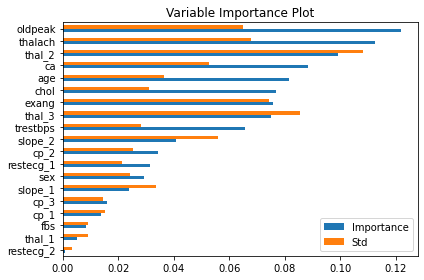

In [35]:
# Develop variable importance plot.
score_df = score_df.sort_values('Importance')
ax = score_df.plot(kind='barh', x='Feature')
ax.set_ylabel('')
plt.title('Variable Importance Plot')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

## Boosted Tree

In [36]:
# Apply GradientBoostingClassifier() function to develop a combined
# boosted tree.  
boost = GradientBoostingClassifier(random_state=1,
                n_estimators=150,                
                learning_rate=0.05,      
                subsample=0.7)
boost.fit(train_X, train_y)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=150, random_state=1,
                           subsample=0.7)

In [37]:
# Confusion matrices for Boosted Tree classification. 

# Identify  and show confusion matrix for training partition. 
print('Training Partition for Boosted Tree')
classificationSummary(train_y, boost.predict(train_X))

# Identify  and show confusion matrix for validation partition. 
print()
print('Validation Partition for Boosted Tree')
classificationSummary(valid_y, boost.predict(valid_X))

Training Partition for Boosted Tree
Confusion Matrix (Accuracy 0.9837)

       Prediction
Actual   0   1
     0 278   8
     1   2 327

Validation Partition for Boosted Tree
Confusion Matrix (Accuracy 0.9024)

       Prediction
Actual   0   1
     0 180  33
     1   7 190


## Neural Network Model

## <font color= "Orange">Different Neural Network Models:
<ol>
  <font color= "Blue"><li>Neural Network Model using multiple Predictors</li>
      <li>Neural Network Model Based on Grid Search</li>
</ol>

## Neural network Model for Heart Disease dataset

In [38]:
# Create heart_disease_df outcome and predictors to run neural network
# model.
outcome = 'target'
predictors = [c for c in heart_disease_df.columns if c != outcome]


# Create predictors and outcome variables.  
X = heart_disease_df[predictors]
y = heart_disease_df[outcome]

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the heart_disease_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.2, random_state=1)

# Use MLPCclassifier() function to train neural network model.
# Apply: 
# (a) default input layer with the number of nodes equal 
#     to number of predictor variables (20); 
# (b) single hidden layer with 3 nodes (default is 2); 
# (c) default output layer with the number nodes equal
#     to number of classes in outcome variable (2);
# (d) 'logistic' activation function;
# (e) solver = 'lbfgs', which is applied for small data 
#     sets for better performance and fast convergence. 
#     For large data sets, apply default solver = 'adam'. 
heart_disease_clf = MLPClassifier(hidden_layer_sizes=(3), max_iter=10000,activation='logistic',
                    solver='lbfgs', random_state=1)
heart_disease_clf.fit(train_X, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Heart disease Neural Network Model')
print(heart_disease_clf.intercepts_)

print()
print('Network Weights for Heart disease Neural Network Model')
print(heart_disease_clf.coefs_)

Final Intercepts for Heart disease Neural Network Model
[array([ 0.75532584,  0.05385121, -0.45475607]), array([-1.39229017])]

Network Weights for Heart disease Neural Network Model
[array([[-3.46860397e+00,  1.30898887e-01,  1.12440540e+00],
       [ 5.24878451e+00, -2.10122588e-01, -4.84009478e+01],
       [-3.69881976e+01, -9.20798413e-02, -1.33364554e+00],
       [ 3.35695254e+01, -4.83818536e-02, -2.50451284e-01],
       [-3.04483442e+00,  2.24919053e-01, -1.28388171e+00],
       [-2.04196247e+01, -4.94531278e-02,  1.33077479e+00],
       [ 1.31354491e+00, -1.79580381e-01, -2.33771410e+00],
       [-7.66813924e+00, -1.10985822e-01, -9.77237161e+00],
       [ 9.05190260e+00,  2.34729042e-01, -5.24687122e+01],
       [ 1.83896422e+00, -1.96398087e-01,  1.18038197e+01],
       [-9.55549272e+00, -4.69284913e-02,  6.02707204e+01],
       [-5.85759014e-01,  1.14136135e-01,  3.48703543e+01],
       [ 5.20909434e+00,  1.99046199e-01,  4.76944872e+00],
       [ 1.65547776e-01,  2.90794027

In [39]:
# Make heart disease classification for validation set 
# using heart disease neural network model. 

# Use heart_disease_clf model to classify heart disease
# for validation set.
heart_pred = heart_disease_clf.predict(valid_X)

# Predict target probabilities p(0), p(1),
# and p(2) for validation set.
heart_pred_prob = np.round(heart_disease_clf.predict_proba(valid_X), 
                          decimals=4)

# Create data frame to display classification results for
# validation set. 
heart_pred_result = pd.DataFrame({'Actual': valid_y, 
                'p(0)': [p[0] for p in heart_pred_prob],
                'p(1)': [p[1] for p in heart_pred_prob],
                'Classification': heart_pred})

print('Classification for heart disease data for Validation Partition')
print(heart_pred_result.head(10))

Classification for heart disease data for Validation Partition
     Actual    p(0)    p(1)  Classification
49        0  0.8010  0.1990               0
525       1  0.1338  0.8662               1
119       1  0.1338  0.8662               1
629       0  0.9253  0.0747               0
186       0  0.8010  0.1990               0
691       1  0.0465  0.9535               1
473       1  0.0465  0.9535               1
422       1  0.1338  0.8662               1
27        0  0.9272  0.0728               0
815       1  0.1338  0.8662               1


In [40]:
# Confusion matrices for heart disease neural network model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Neural Network Model')
classificationSummary(train_y, heart_disease_clf.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Neural Network Model')
classificationSummary(valid_y, heart_disease_clf.predict(valid_X))

Training Partition for Neural Network Model
Confusion Matrix (Accuracy 0.8939)

       Prediction
Actual   0   1
     0 356  34
     1  53 377

Validation Partition for Neural Network Model
Confusion Matrix (Accuracy 0.9171)

       Prediction
Actual   0   1
     0 105   4
     1  13  83


## Neural network Model using Grid Search

In [41]:
# Identify grid search parameters. 
param_grid = {
    'hidden_layer_sizes': list(range(2, 20)), 
}

# Utilize GridSearchCV() to identify the best number 
# of nodes in the hidden layer. 
gridSearch = GridSearchCV(MLPClassifier(solver='lbfgs', max_iter=10000, random_state=1), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)

# Display the best score and best parament value.
print(f'Best score:{gridSearch.best_score_:.4f}')
print('Best parameter: ', gridSearch.best_params_)

Best score:0.8610
Best parameter:  {'hidden_layer_sizes': 10}


In [42]:
# Use MLPCclassifier() function to train the improved neural network model
# based on grid search results. 

# Apply: 
# (a) default input layer with the number of nodes equal 
#     to number of predictor variables (20); 
# (b) single hidden layer with 10 nodes based on grid search; 
# (c) default output layer with the number nodes equal
#     to number of classes in outcome variable (2);
# (d) 'logistic' activation function;
# (e) solver = 'lbfgs', which is applied for small data 
#     sets for better performance and fast convergence. 
#     For large data sets, apply default solver = 'adam'. 
heart_disease_clf_imp = MLPClassifier(hidden_layer_sizes=(10), max_iter=10000,
                activation='logistic', solver='lbfgs', random_state=1)
heart_disease_clf_imp.fit(train_X, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Heart disease Neural Network Model based on grid search')
print(heart_disease_clf_imp.intercepts_)

print()
print('Network Weights for Heart disease Neural Network Model based on grid search')
print(heart_disease_clf_imp.coefs_)

Final Intercepts for Heart disease Neural Network Model based on grid search
[array([-0.12432263, -0.2279684 , 13.16557374,  0.03596696,  0.21419537,
        0.22688358, -0.32576228, -0.29467387,  0.061335  ,  0.23583493]), array([0.24699098])]

Network Weights for Heart disease Neural Network Model based on grid search
[array([[-3.87405784e-02,  1.02864664e-01, -1.66734484e+00,
        -1.76040096e-01, -1.64922726e-01, -1.90285326e-01,
        -5.21126183e+00, -1.02261704e+01, -4.81969677e-02,
         1.81226688e-02],
       [-3.77262820e-02,  8.64748606e-02,  4.94398010e+01,
         4.76602287e-01, -2.20652210e-01,  7.95882087e-02,
        -5.59710521e+00, -8.28241930e-03, -1.67895331e-01,
        -1.40949693e-01],
       [ 1.40410943e-01,  2.18621014e-01,  3.74529449e-01,
         4.52408011e+00,  1.75726254e-01,  1.84351760e-01,
        -3.43871829e+01, -3.26747232e+01, -1.54148826e-01,
         1.76546315e-01],
       [-1.87522920e-01, -3.68325571e-02, -9.52937815e-02,
        -

In [43]:
# Make heart disease classification for validation set 
# using heart disease neural network model. 

# Use heart_disease_clf_imp model to classify heart disease
# for validation set.
heart_pred_imp = heart_disease_clf_imp.predict(valid_X)

# Predict heart disease probabilities p(0), p(1),
# and p(2) for validation set.
heart_pred_prob_imp = np.round(heart_disease_clf_imp.predict_proba(valid_X), 
                          decimals=4)

# Create data frame to display classification results for
# validation set. 
heart_pred_imp_result = pd.DataFrame({'Actual': valid_y, 
                'p(0)': [p[0] for p in heart_pred_prob_imp],
                'p(1)': [p[1] for p in heart_pred_prob_imp],
                'Classification': heart_pred_imp})

print('Classification for Heart disease Data for Validation Partition')
print(heart_pred_imp_result.head(10))

Classification for Heart disease Data for Validation Partition
     Actual    p(0)    p(1)  Classification
49        0  0.8401  0.1599               0
525       1  0.1781  0.8219               1
119       1  0.1781  0.8219               1
629       0  0.9540  0.0460               0
186       0  0.9151  0.0849               0
691       1  0.0814  0.9186               1
473       1  0.0415  0.9585               1
422       1  0.1781  0.8219               1
27        0  0.9634  0.0366               0
815       1  0.1002  0.8998               1


In [44]:
# Confusion matrices for improved neural network model for heart disease
# using grid search results. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Neural Network Model based on grid search')
classificationSummary(train_y, heart_disease_clf_imp.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Neural Network Model based on grid search')
classificationSummary(valid_y, heart_disease_clf_imp.predict(valid_X))

Training Partition for Neural Network Model based on grid search
Confusion Matrix (Accuracy 0.9085)

       Prediction
Actual   0   1
     0 357  33
     1  42 388

Validation Partition for Neural Network Model based on grid search
Confusion Matrix (Accuracy 0.9220)

       Prediction
Actual   0   1
     0 102   7
     1   9  87
